# 1) Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. 

# 2) Fit a linear regression model to predict the 'price' using the feature 'sqft_living'

# 3) Evaluate the model for accuracy using the methods taught in class 



# Introduction

<p> This project is based on the sales of homes in King County, in Washington state, USA, from 2014 to 2015. It is highly suburban. It also includes the urban Seattle.  </p>

<p> The following is the ready to execute code for the linear regression model between parameters "sqft_living" (denoting the area in square feet of the living room) and the price at which the home was sold. Required plots can easily be generated by changing the variable <code>indp_var</code>. </p>
    
# Lemma

<p> The area of the living room directly correlates to the price of the home.
    The reasoning behind this is that this is a suburban county, hence living space is prioritised.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
%matplotlib inline

f = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
indp_var = "sqft_living"

df = pd.read_csv(f)
l = len(df)
#Removing unnecessary attributes
df.drop(["id", "Unnamed: 0"], axis = 1, inplace = True)
display(df)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


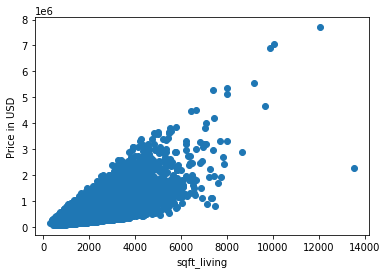

In [2]:
plt.scatter(df[indp_var], df["price"])
plt.xlabel(indp_var); plt.ylabel("Price in USD")
plt.show()
#df[indp_var].replace(np.nan, np.mean(df[indp_var]/l), inplace = True)
df[indp_var].replace(np.nan, 0.0, inplace = True)



In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(df, df, test_size = .2, random_state = 4)

xtrain_arr = np.asanyarray(xtrain[[indp_var]])
ytrain_arr = np.asanyarray(xtrain[["price"]])
regr = linear_model.LinearRegression()
regr.fit(xtrain_arr, ytrain_arr)

a = regr.coef_ ; b =regr.intercept_
print("The coefficient or slope =", a[0][0], "and y-intercept =", b[0])

The coefficient or slope = 281.83375216000024 and y-intercept = -45850.76735560526


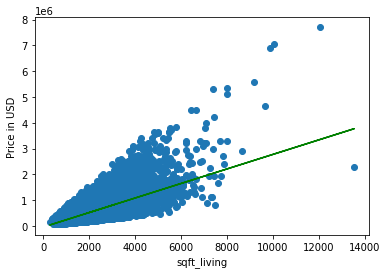

In [4]:
plt.scatter(df[indp_var], df["price"])
plt.xlabel(indp_var); plt.ylabel("Price in USD")


plt.plot(xtrain_arr, a[0][0] * xtrain_arr + b[0], color = 'green' )


plt.show()


Mean absolute error = 8.01952622105321 and mean square error = 3093754.956167733


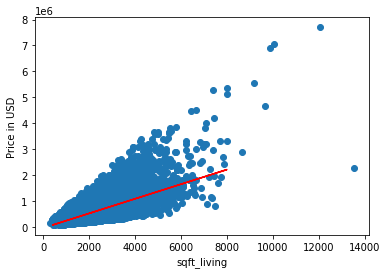

In [5]:
#Converting test set to ndarrays

xtest_arr = np.asanyarray(xtest[[indp_var]])
ytest_arr = np.asanyarray(xtest[["price"]])

#Testing the trained model

y_test_ = regr.predict(xtest_arr)

#Obtaining the accuracy: mean absolute and square errors

mae = np.mean( np.absolute(y_test_ - ytest_arr)) 
mse=np.mean((y_test_ - ytest_arr) ** 2)
print("Mean absolute error =", mae/l, "and mean square error =", mse/l)

#Plotting the test

plt.scatter(df[indp_var], df["price"])
plt.xlabel(indp_var); plt.ylabel("Price in USD")

plt.plot(xtest_arr, a[0][0]*xtest_arr + b[0], color = "red")
plt.show()


# Inference
<p>The linear model is highly inaccurate for modelling the square footage of the living room.</p>

# Changing the independent variable

<p><b>sqft_living:</b> MAE = 8.01952622105321,  MSE = 3093754.956167733</p>

<p><b>sqft_living15:</b> MAE = 10.635270694112146, MSE = 5941374.935368619 </p>

<p><b>bedrooms: MAE = 10.158419832974712</b> , MSE = 5437296.567577256 </p>

<p><b>sqft_lot (Square footage of the land):</b> MAE = 10.625294828936248 , MSE = 5927072.61627958

<p>    An interesting observation is that when the square footage of the lot is less, it sells for more. This could be due to the smaller homes for sale in the highly-populous metropolitan of Seattle.

*MAE = mean absolute error. MSE = mean square error</p>


# Plotting date of the sale

<p> Below is the model of time of sale and price of the home. Time is a major player for deciding price in any market. The date has been approximated to seconds.</p>

The coefficient or slope = -0.00036758733827978564 and y-intercept = 23912608.100667913
Mean absolute error = 10.715929833035842 and mean square error = 5987291.23250081


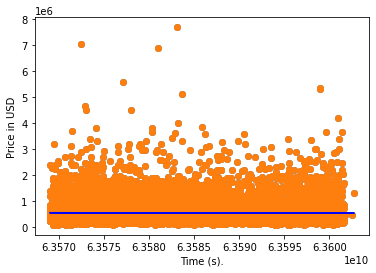

In [6]:

indp_var = "date"

arr = np.asanyarray(df[indp_var])


for i in range(l):
    y = int(arr[i][:8:][:4:]) * 31556952
    m = int(arr[i][:8:][4:6:]) * 2628288
    d = int(arr[i][:8:][6:8:]) * 86400
    arr[i] = y+m+d
    
s = pd.Series(arr, range(l))
    
df.replace(df["date"], s,  inplace = True)
indp_var = "date"


df[indp_var].replace(np.nan, np.mean(df[indp_var]/l), inplace = True)

xtrain, xtest, ytrain, ytest = train_test_split(df, df, test_size = .2, random_state = 4)

xtrain_arr = np.asanyarray(xtrain[[indp_var]])
ytrain_arr = np.asanyarray(xtrain[["price"]])
regr = linear_model.LinearRegression()
regr.fit(xtrain_arr, ytrain_arr)

a = regr.coef_ ; b =regr.intercept_
print("The coefficient or slope =", a[0][0], "and y-intercept =", b[0])


plt.scatter(df[indp_var], df["price"])
plt.xlabel("Time (s)"); plt.ylabel("Price in USD")




#Converting test set to ndarrays

xtest_arr = np.asanyarray(xtest[[indp_var]])
ytest_arr = np.asanyarray(xtest[["price"]])

#Testing the trained model

y_test_ = regr.predict(xtest_arr)

#Obtaining the accuracy: mean absolute and square errors



mae = np.mean( np.absolute(y_test_ - ytest_arr)) 
mse=np.mean((y_test_ - ytest_arr) ** 2)
print("Mean absolute error =", mae/l, "and mean square error =", mse/l)


plt.scatter(df[indp_var], df["price"])
plt.xlabel("Time (s)."); plt.ylabel("Price in USD")

plt.plot(xtest_arr, a[0][0]*xtest_arr + b[0], color = "blue")
plt.show()

# Inference

<p>The linear model for time is massively inaccurate. Perhaps sales are seasonal hence there isn't a direct relationship.</p>